In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D  # convolution Layer
from keras.layers import MaxPooling2D   # Pooling Layer
from keras.layers import Flatten        # Flatten
from keras.layers import Dense          # Hidden Layer & Output Layer

import warnings 
warnings.filterwarnings("ignore")

In [132]:
# Initialising the CNN
classifier = Sequential()

################### CNN - 1 ###################
# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

################### CNN - 2 ###################

classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


#################### Flattening Layer ################### 
classifier.add(Flatten())

#################### Step 4 - Full connection  ( Neural Netwokr) ###################
classifier.add(Dense(units = 128, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 128 NEURONS 
classifier.add(Dense(units = 3, activation = 'softmax'))  ## OUTPUT LAYER WITH 1 NUERONS # sigmoid = probability

In [134]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [136]:
classifier.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,755 (57.64 KB)

 Trainable params: 14,755 (57.64 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"C:\Users\hp\Desktop\Shoe Classification\train",
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'categorical') # binary because we have 2 type = cat / dogs

test_set = test_datagen.flow_from_directory(r"C:\Users\hp\Desktop\Shoe Classification\test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 778 images belonging to 3 classes.
Found 89 images belonging to 3 classes.


In [140]:
training_set.class_indices

{'Boots': 0, 'Sandals': 1, 'Slippers': 2}

In [142]:
result = classifier.fit(training_set,
                         epochs=10, # iteration or repeat 
                         validation_data = test_set)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step - accuracy: 0.4126 - loss: 1.0587 - val_accuracy: 0.3483 - val_loss: 1.1654
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.5334 - loss: 1.0338 - val_accuracy: 0.4944 - val_loss: 1.1803
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.5321 - loss: 0.9868 - val_accuracy: 0.5169 - val_loss: 1.0541
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6452 - loss: 0.8700 - val_accuracy: 0.5618 - val_loss: 0.9015
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.6812 - loss: 0.7135 - val_accuracy: 0.5843 - val_loss: 0.7137
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.6967 - loss: 0.6372 - val_accuracy: 0.5618 - val_loss: 0.6811
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.6992 - loss: 0.5887 - val_accuracy: 0.5955 - val_loss: 0.6568
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.7275 - loss: 0.5646 - val_accuracy: 0.7528 - 

In [144]:
classifier.save('shoe_classifier.h5')

In [146]:
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [148]:
model = load_model("shoe_classifier.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
prediction probabilities:[[0.02036569 0.52630347 0.45333084]]
The result is 1


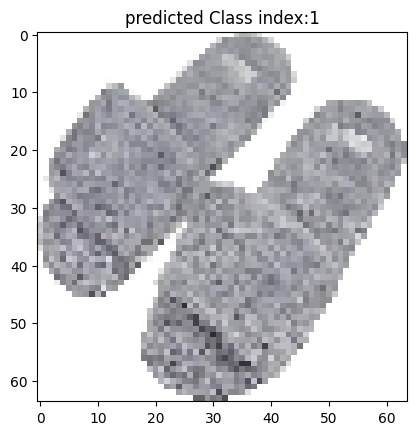

In [168]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))   # importing image is converted to 64*64
    raw_img_array = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    prediction = model.predict(raw_img)
    predicted_class_index=np.argmax(prediction,axis=1)[0]
    print(f"prediction probabilities:{prediction}")# probability
    plt.imshow(raw_img_array.astype('uint8')) 
    plt.title(f"predicted Class index:{predicted_class_index}")
    
    return predicted_class_index# Display Image
    
path_to_image=r"C:\Users\hp\Downloads\softy2.jpg"

final = model_output(path_to_image)

print(f"The result is {final}")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
prediction probabilities:[[0.37649128 0.5074622  0.11604653]]
The result of 1


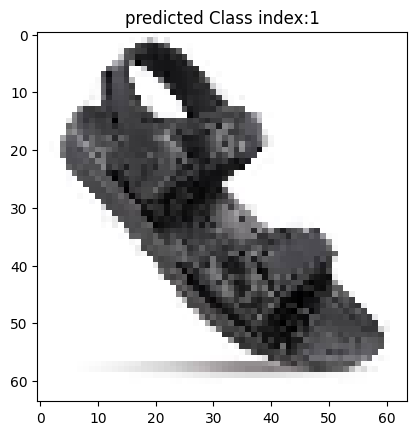

In [162]:
image2=r"C:\Users\hp\Downloads\sandal.jpg"

final2= model_output(image2)

print(f"The result of {final2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
prediction probabilities:[[0.6559107  0.30266032 0.04142896]]
The result of 0


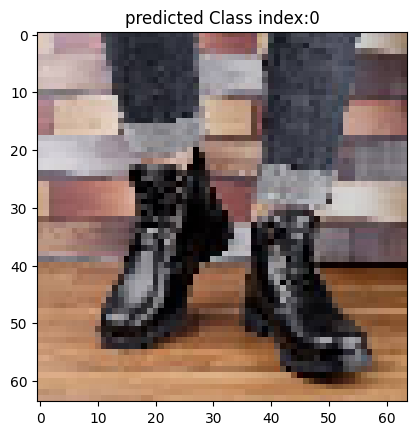

In [176]:
image3=r"C:\Users\hp\Downloads\boots.jpg"
final3= model_output(image3)

print(f"The result of {final3}")